# Amazon Indian Clothing Sales (EDA)

## Introduction

The dataset on traditional Indian clothing sales on Amazon suggests interconnected influences among spending habits, geography, product choices, fulfillment methods, and transaction types. These factors collectively shape the market dynamics. 

The following exploratory data analysis will untangle these connections, providing valuable insights for sellers and stakeholders in this domain.

### Hypotheses

- Most populated states and cities are the leaders in number of orders.
- The most used clothing types in the country are the preferred product categories.
- The top preferred product categories drive sales revenue.
- The top requested clothing sizes are Medium, Small, and Large, respectively.
- Amazon is not the leader on product fulfillment.
- Negative order status are dominated by merchants.
- Months during summer drive sales revenue.
- Higher trend fluctuations will be seen on Non-B2B sales.
- B2B sales account for higher average revenue.

## Data Cleaning

In [186]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")  # This is to ignore any warnings that might pop up during execution

In [187]:
# Basic libraries to manipulate data
import matplotlib.pyplot as plt  # Matplotlib for data visualization
import numpy as np  # Numpy for numerical computations
import pandas as pd  # Pandas for data manipulation
import plotly.express as px #Plotly for better visualization
import seaborn as sns #Seaborn for data visualization

In [188]:
np.random.seed(13)  # To ensure all the probabilistic things are reproducible

In [189]:
#Specifing path to data 
data_path = "./data/"

# Specify filename
sale_filename = "Amazon Sale Report.csv"  

# #Converting the csv dataset into Pandas Dataframe
sale_df_data = pd.read_csv(data_path + sale_filename)

# Create working copy
sale_df = sale_df_data.copy()

In [190]:
# Check overview
sale_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [191]:
# Delete columns we won't be using
sale_df=sale_df.drop(columns=['index','currency', 'SKU', 'Courier Status', 'ship-country', 'Unnamed: 22', 'fulfilled-by'], axis=1)

In [192]:
# Delete column
sale_df = sale_df.drop(sale_df.columns[4], axis=1)

In [193]:
# Control
sale_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            128975 non-null  object 
 1   Date                128975 non-null  object 
 2   Status              128975 non-null  object 
 3   Fulfilment          128975 non-null  object 
 4   ship-service-level  128975 non-null  object 
 5   Style               128975 non-null  object 
 6   Category            128975 non-null  object 
 7   Size                128975 non-null  object 
 8   ASIN                128975 non-null  object 
 9   Qty                 128975 non-null  int64  
 10  Amount              121180 non-null  float64
 11  ship-city           128942 non-null  object 
 12  ship-state          128942 non-null  object 
 13  ship-postal-code    128942 non-null  float64
 14  promotion-ids       79822 non-null   object 
 15  B2B                 128975 non-nul

## Normalizing Data

In [194]:
# Check the length of the variable Date
sale_df['Date'].str.len().value_counts(dropna=False) 

Date
7    86321
6    42654
Name: count, dtype: int64

In [195]:
# Have an overview of the values in Date
sale_df['Date'].unique()

array(['4/30/22', '4/29/22', '4/28/22', '4/27/22', '4/26/22', '4/25/22',
       '4/24/22', '4/23/22', '4/22/22', '4/21/22', '4/20/22', '4/19/22',
       '4/18/22', '4/17/22', '4/16/22', '4/15/22', '4/14/22', '4/13/22',
       '4/12/22', '4/11/22', '4/10/22', '4/9/22', '4/8/22', '4/7/22',
       '4/6/22', '4/5/22', '4/4/22', '4/3/22', '4/2/22', '4/1/22',
       '3/31/22', '5/31/22', '5/30/22', '5/29/22', '5/28/22', '5/27/22',
       '5/26/22', '5/25/22', '5/24/22', '5/23/22', '5/22/22', '5/21/22',
       '5/20/22', '5/19/22', '5/18/22', '5/17/22', '5/16/22', '5/15/22',
       '5/14/22', '5/13/22', '5/12/22', '5/11/22', '5/10/22', '5/9/22',
       '5/8/22', '5/7/22', '5/6/22', '5/5/22', '5/4/22', '5/3/22',
       '5/2/22', '5/1/22', '6/29/22', '6/28/22', '6/27/22', '6/26/22',
       '6/25/22', '6/24/22', '6/23/22', '6/22/22', '6/21/22', '6/20/22',
       '6/19/22', '6/18/22', '6/17/22', '6/16/22', '6/15/22', '6/14/22',
       '6/13/22', '6/12/22', '6/11/22', '6/10/22', '6/9/22', '6/8/22'

In [196]:
# Converting the Date coloumn which was object earlier to datatime64 datatype
sale_df['Date']=pd.to_datetime(sale_df['Date'])

In [197]:
# Check if the change was made
sale_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Order ID            128975 non-null  object        
 1   Date                128975 non-null  datetime64[ns]
 2   Status              128975 non-null  object        
 3   Fulfilment          128975 non-null  object        
 4   ship-service-level  128975 non-null  object        
 5   Style               128975 non-null  object        
 6   Category            128975 non-null  object        
 7   Size                128975 non-null  object        
 8   ASIN                128975 non-null  object        
 9   Qty                 128975 non-null  int64         
 10  Amount              121180 non-null  float64       
 11  ship-city           128942 non-null  object        
 12  ship-state          128942 non-null  object        
 13  ship-postal-code    128942 no

In [198]:
# Check if someone made more than one order or if Order ID is a primary key
sale_df['Order ID'].value_counts(dropna=False)

Order ID
171-5057375-2831560    12
403-4984515-8861958    12
403-0173977-3041148    11
404-9932919-6662730    11
408-3317403-1729937    10
                       ..
403-2697348-7766749     1
405-0271223-6692335     1
406-7498475-4257161     1
402-2493916-3621929     1
408-7436540-8728312     1
Name: count, Length: 120378, dtype: int64

In [199]:
# Change dtype of Order ID which was object to category
sale_df['Order ID']=sale_df['Order ID'].astype('category')

In [200]:
# Checking the value count of all other categorical variables
for col in ['Status', 'Fulfilment', 'ship-service-level', 'Style', 'Category', 'Size', 'ASIN','ship-state', 'promotion-ids', 'B2B']:
    print(sale_df[col].value_counts(dropna=False))

Status
Shipped                          77804
Shipped - Delivered to Buyer     28769
Cancelled                        18332
Shipped - Returned to Seller      1953
Shipped - Picked Up                973
Pending                            658
Pending - Waiting for Pick Up      281
Shipped - Returning to Seller      145
Shipped - Out for Delivery          35
Shipped - Rejected by Buyer         11
Shipping                             8
Shipped - Lost in Transit            5
Shipped - Damaged                    1
Name: count, dtype: int64
Fulfilment
Amazon      89698
Merchant    39277
Name: count, dtype: int64
ship-service-level
Expedited    88615
Standard     40360
Name: count, dtype: int64
Style
JNE3797    4224
JNE3405    2263
J0230      1868
SET268     1860
J0341      1630
           ... 
BTM004        1
SET036        1
JNE3157       1
JNE3355       1
SET045        1
Name: count, Length: 1377, dtype: int64
Category
Set              50284
kurta            49877
Western Dress    15500
Top 

### Note 1

- Since the column style has different lengths, entries will be kept the same; no change should be made.

In [201]:
# Check the length of the different style codes
sale_df['Style'].str.len().value_counts(dropna=False) 

Style
7    58397
6    35063
5    34008
8     1507
Name: count, dtype: int64

In [202]:
# Clean the ship-state column
sale_df['ship-state']=sale_df['ship-state'].str.lower()
sale_df['ship-state'][sale_df['ship-state'].str.len()<3]=np.nan

In [203]:
# Assign dtype to the categorical variables
for col in ['Status', 'Fulfilment', 'ship-service-level', 'Style', 'Category', 'Size', 'ASIN', 'ship-city', 'ship-state', 'promotion-ids']:
    sale_df[col]=sale_df[col].astype('category')

In [204]:
# Assign dtype to variable B2B
sale_df['B2B']=sale_df['B2B'].astype('bool')

In [205]:
# Check if the changes have been made
sale_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Order ID            128975 non-null  category      
 1   Date                128975 non-null  datetime64[ns]
 2   Status              128975 non-null  category      
 3   Fulfilment          128975 non-null  category      
 4   ship-service-level  128975 non-null  category      
 5   Style               128975 non-null  category      
 6   Category            128975 non-null  category      
 7   Size                128975 non-null  category      
 8   ASIN                128975 non-null  category      
 9   Qty                 128975 non-null  int64         
 10  Amount              121180 non-null  float64       
 11  ship-city           128942 non-null  category      
 12  ship-state          128936 non-null  category      
 13  ship-postal-code    128942 no

In [206]:
# Performing statistical analysis on numerical datatype coloumns
sale_df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,128975,2022-05-12 11:49:27.951928576,2022-03-31 00:00:00,2022-04-20 00:00:00,2022-05-10 00:00:00,2022-06-04 00:00:00,2022-06-29 00:00:00,NaN
Qty,128975.0,0.904431,0.0,1.0,1.0,1.0,15.0,0.313354
Amount,121180.0,648.561465,0.0,449.0,605.0,788.0,5584.0,281.211687
ship-postal-code,128942.0,463966.236509,110001.0,382421.0,500033.0,600024.0,989898.0,191476.764941


In [207]:
# Restrict the database to only rows with quantities higher than 1
sale_df=sale_df[sale_df['Qty']>=1]

In [208]:
# Recheck the overview
sale_df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,116168,2022-05-12 14:15:24.729701888,2022-03-31 00:00:00,2022-04-20 00:00:00,2022-05-10 00:00:00,2022-06-05 00:00:00,2022-06-29 00:00:00,NaN
Qty,116168.0,1.004141,1.0,1.0,1.0,1.0,15.0,0.0943
Amount,116044.0,649.775137,0.0,449.0,606.0,788.0,5584.0,282.638056
ship-postal-code,116140.0,463241.002385,110001.0,382424.0,500032.0,600017.0,855117.0,191017.163865


In [209]:
# Overview of the categorical variables
sale_df.describe(include=['category']).T

,count,unique,top,freq
Order ID,116168,108419,403-4984515-8861958,12
Status,116168,13,Shipped,77711
Fulfilment,116168,2,Amazon,83763
ship-service-level,116168,2,Expedited,82723
Style,116168,1372,JNE3797,3677
Category,116168,9,Set,45150
Size,116168,11,M,20364
ASIN,116168,7137,B09SDXFFQ1,660
ship-city,116140,8499,BENGALURU,10388
ship-state,116134,42,maharashtra,20273


In [210]:
# Check for missing values
sale_df.isna().sum()

Order ID                  0
Date                      0
Status                    0
Fulfilment                0
ship-service-level        0
Style                     0
Category                  0
Size                      0
ASIN                      0
Qty                       0
Amount                  124
ship-city                28
ship-state               34
ship-postal-code         28
promotion-ids         36686
B2B                       0
dtype: int64

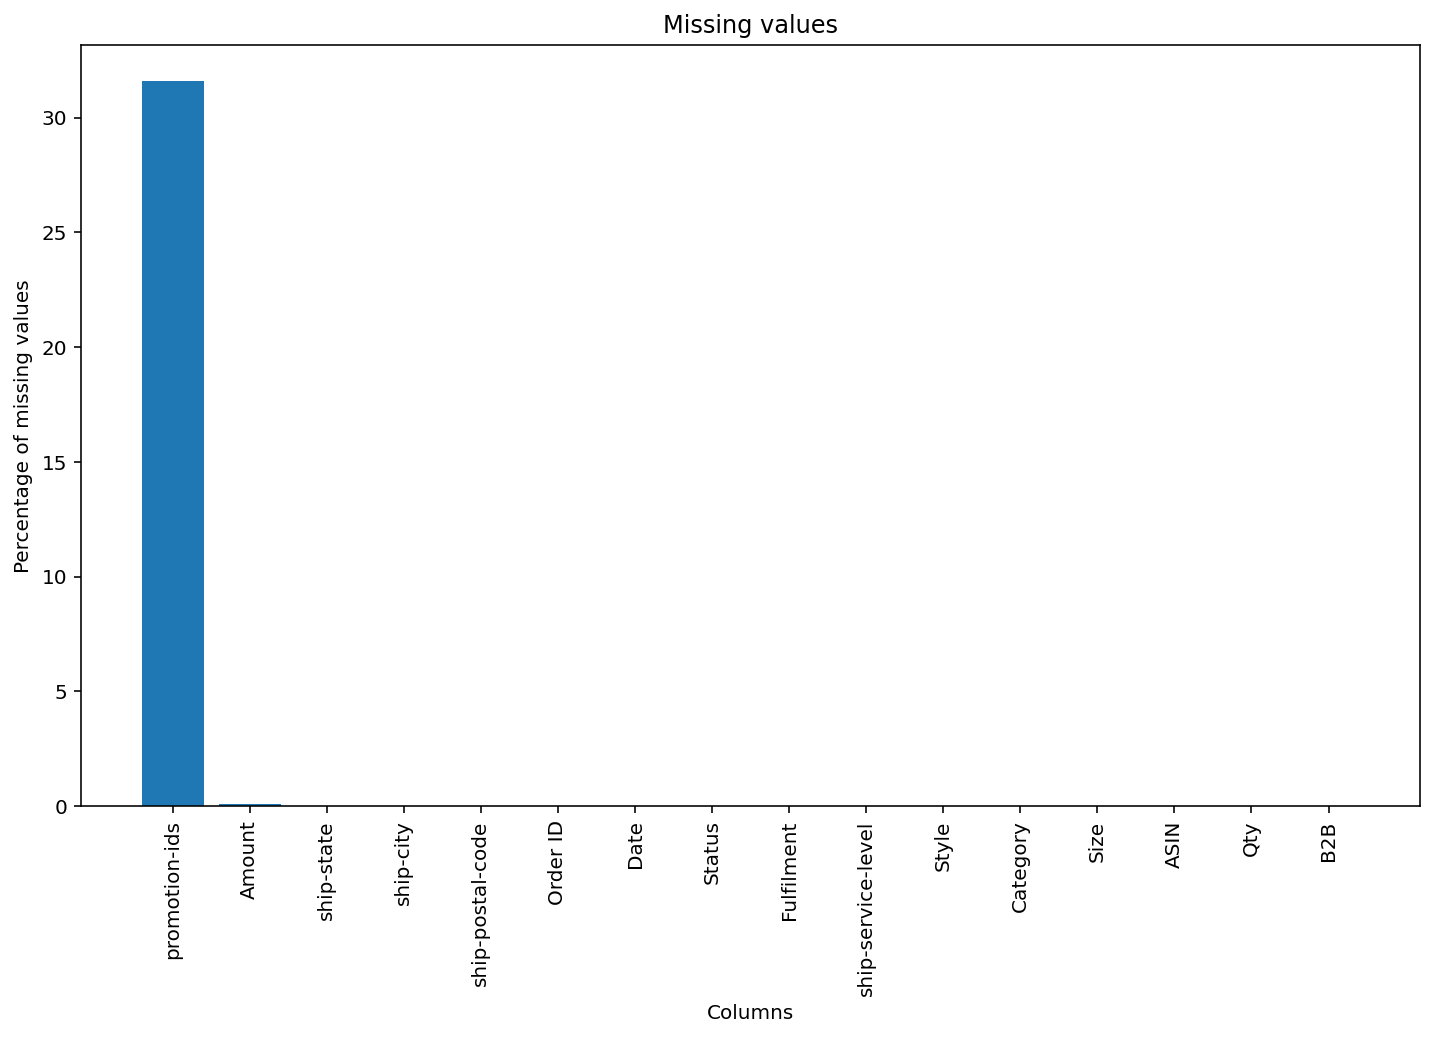

In [211]:
# Visualize missing values
def visualize_null(dataframe,percentage=True):
    null_series=sale_df.isna().sum().sort_values(ascending=False)
    if percentage:
        null_series=null_series/len(dataframe)*100

    plt.bar(x=null_series.index,height=null_series.values)

    if percentage:
        plt.ylabel('Percentage of missing values')
    else:
        plt.ylabel('Amount of missing values')
    plt.title('Missing values')
    plt.xlabel('Columns')
    plt.xticks(rotation=90)
    plt.show()

visualize_null(sale_df)

In [212]:
# Assign value none to Nan of promotion-ids
sale_df['promotion-ids'] = sale_df['promotion-ids'].cat.add_categories('none')
sale_df['promotion-ids'] = sale_df['promotion-ids'].fillna('none')
sale_df['promotion-ids'].unique()

['Amazon PLCC Free-Financing Universal Merchant..., 'IN Core Free Shipping 2015/04/08 23-48-5-108', 'none', 'Amazon PLCC Free-Financing Universal Merchant..., 'Amazon PLCC Free-Financing Universal Merchant..., ..., 'Amazon PLCC Free-Financing Universal Merchant..., 'Amazon PLCC Free-Financing Universal Merchant..., 'Amazon PLCC Free-Financing Universal Merchant..., 'Amazon PLCC Free-Financing Universal Merchant..., 'Amazon PLCC Free-Financing Universal Merchant...]
Length: 5788
Categories (5788, object): ['Amazon PLCC Free-Financing Universal Merchant..., 'Amazon PLCC Free-Financing Universal Merchant..., 'Amazon PLCC Free-Financing Universal Merchant..., 'Amazon PLCC Free-Financing Universal Merchant..., ..., 'VPC-44571-44201687 Coupon', 'VPC-44571-44201770 Coupon', 'VPC-44571-44201853 Coupon', 'none']

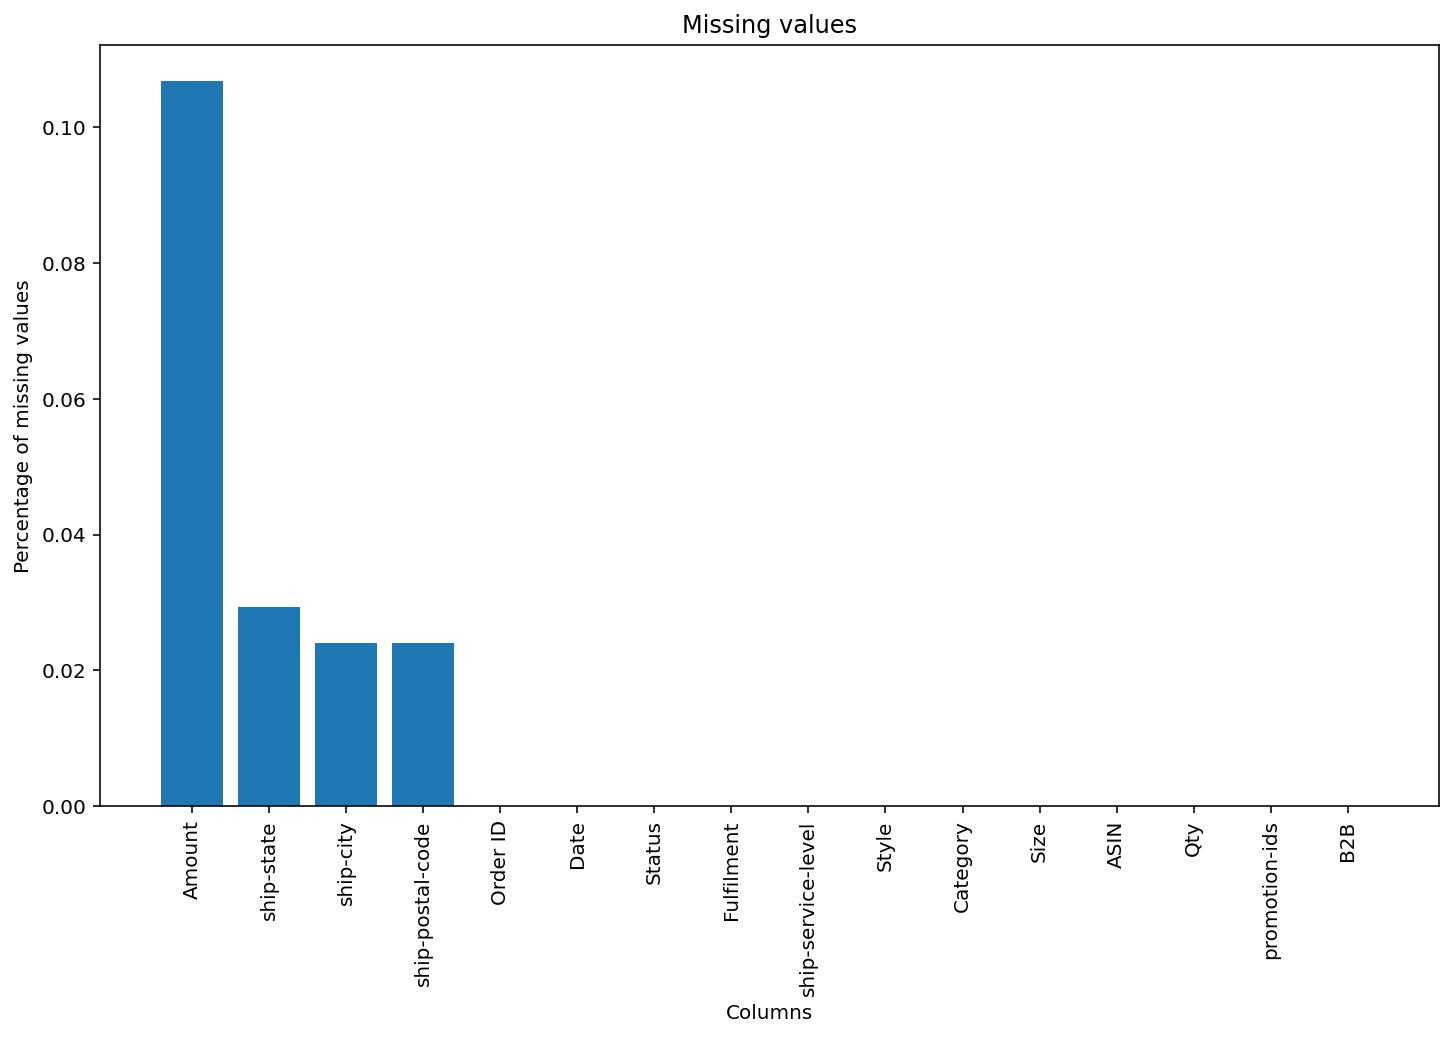

In [213]:
# Visualize Nan after the first change
visualize_null(sale_df)

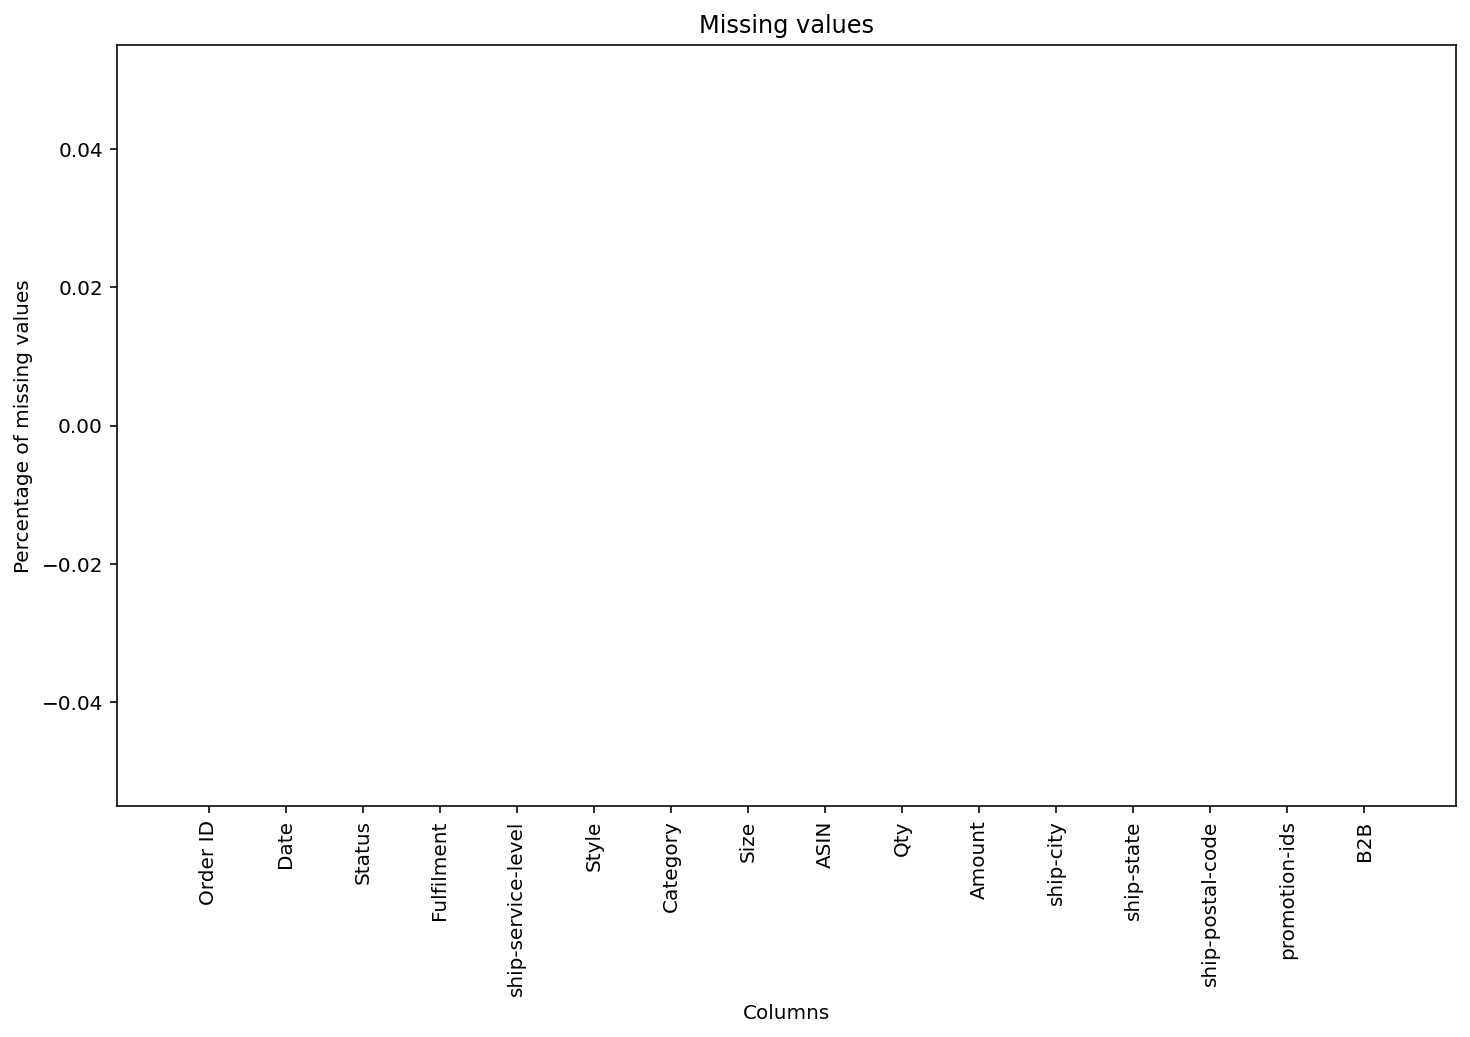

In [214]:
# Drop rows with the Nan values and check if there is still any left
sale_df = sale_df.dropna(subset=['Amount', 'ship-postal-code', 'ship-state'])
visualize_null(sale_df)

In [215]:
# Check for duplicates
sale_df[sale_df.duplicated()]

,Order ID,Date,Status,Fulfilment,ship-service-level,Style,Category,Size,ASIN,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,B2B
85791,171-3249942-2207542,2022-05-03,Shipped,Amazon,Expedited,SET323,Set,XL,B09NDKKM7P,1,939.0,PUNE,maharashtra,411057.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
86419,405-8669298-3850736,2022-05-03,Shipped,Amazon,Expedited,MEN5025,kurta,3XL,B08YYQS8FH,1,533.0,GHAZIABAD,uttar pradesh,201010.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
98955,407-4853873-4978725,2022-06-22,Shipped,Amazon,Expedited,J0230,Set,M,B08XNJG8B1,1,1163.0,Zirakpur,punjab,140603.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False


In [216]:
# Delete duplicates
sale_df.drop_duplicates()

,Order ID,Date,Status,Fulfilment,ship-service-level,Style,Category,Size,ASIN,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,B2B
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Standard,JNE3781,kurta,3XL,B09K3WFS32,1,406.0,BENGALURU,karnataka,560085.0,Amazon PLCC Free-Financing Universal Merchant ...,False
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Expedited,JNE3371,kurta,XL,B07WV4JV4D,1,329.0,NAVI MUMBAI,maharashtra,410210.0,IN Core Free Shipping 2015/04/08 23-48-5-108,True
4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Expedited,JNE3671,Top,3XL,B098714BZP,1,574.0,CHENNAI,tamil nadu,600073.0,none,False
5,404-1490984-4578765,2022-04-30,Shipped,Amazon,Expedited,SET264,Set,XL,B08YN7XDSG,1,824.0,GHAZIABAD,uttar pradesh,201102.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
6,408-5748499-6859555,2022-04-30,Shipped,Amazon,Expedited,J0095,Set,L,B08CMHNWBN,1,653.0,CHANDIGARH,chandigarh,160036.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,406-6001380-7673107,2022-05-31,Shipped,Amazon,Expedited,JNE3697,kurta,XL,B098112V2V,1,517.0,HYDERABAD,telangana,500013.0,none,False
128971,402-9551604-7544318,2022-05-31,Shipped,Amazon,Expedited,SET401,Set,M,B09VC6KHX8,1,999.0,GURUGRAM,haryana,122004.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
128972,407-9547469-3152358,2022-05-31,Shipped,Amazon,Expedited,J0157,Western Dress,XXL,B0982YZ51B,1,690.0,HYDERABAD,telangana,500049.0,none,False
128973,402-6184140-0545956,2022-05-31,Shipped,Amazon,Expedited,J0012,Set,XS,B0894Y2NJQ,1,1199.0,Halol,gujarat,389350.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False


In [217]:
# Set up an index
sale_df = sale_df.reset_index(drop=True)

In [218]:
# Check the first 5 rows
sale_df.head()

,Order ID,Date,Status,Fulfilment,ship-service-level,Style,Category,Size,ASIN,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,B2B
0,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Standard,JNE3781,kurta,3XL,B09K3WFS32,1,406.0,BENGALURU,karnataka,560085.0,Amazon PLCC Free-Financing Universal Merchant ...,False
1,404-0687676-7273146,2022-04-30,Shipped,Amazon,Expedited,JNE3371,kurta,XL,B07WV4JV4D,1,329.0,NAVI MUMBAI,maharashtra,410210.0,IN Core Free Shipping 2015/04/08 23-48-5-108,True
2,407-1069790-7240320,2022-04-30,Shipped,Amazon,Expedited,JNE3671,Top,3XL,B098714BZP,1,574.0,CHENNAI,tamil nadu,600073.0,none,False
3,404-1490984-4578765,2022-04-30,Shipped,Amazon,Expedited,SET264,Set,XL,B08YN7XDSG,1,824.0,GHAZIABAD,uttar pradesh,201102.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
4,408-5748499-6859555,2022-04-30,Shipped,Amazon,Expedited,J0095,Set,L,B08CMHNWBN,1,653.0,CHANDIGARH,chandigarh,160036.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False


In [219]:
# Check for a sample of the data
sale_df.sample(10)

,Order ID,Date,Status,Fulfilment,ship-service-level,Style,Category,Size,ASIN,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,B2B
99038,171-5737377-4497140,2022-06-13,Shipped,Amazon,Expedited,J0296,Western Dress,XS,B099NS29KD,1,519.0,ERNAKULAM,kerala,682019.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
42311,406-6356287-5861131,2022-04-02,Shipped,Amazon,Expedited,J0346,Set,3XL,B0983G4P9Y,1,474.0,CHENNAI,tamil nadu,600117.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
59187,406-4399805-0129904,2022-05-18,Shipped - Delivered to Buyer,Merchant,Standard,JNE3659,Top,M,B08ZH99ND2,1,493.0,BENGALURU,karnataka,560017.0,Amazon PLCC Free-Financing Universal Merchant ...,False
84739,402-0458568-0253956,2022-06-26,Shipped,Amazon,Expedited,JNE3797,Western Dress,3XL,B09SDY4VDC,1,735.0,CHENNAI,tamil nadu,600017.0,none,False
48744,405-2538507-0168349,2022-05-27,Shipped,Amazon,Expedited,JNE3797,Western Dress,XL,B09SDXRYBG,1,771.0,AHMEDABAD,gujarat,380051.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
67860,402-9533820-2293162,2022-05-10,Shipped - Delivered to Buyer,Merchant,Standard,SET343,Set,3XL,B09NDL4F2Y,1,850.0,Ahmedabad,gujarat,382424.0,Amazon PLCC Free-Financing Universal Merchant ...,False
20863,403-8403133-9257124,2022-04-16,Shipped - Delivered to Buyer,Merchant,Standard,SET324,Set,S,B09NQ4CZ65,1,597.0,HYDERABAD,telangana,500032.0,Amazon PLCC Free-Financing Universal Merchant ...,False
86136,406-0292966-1865137,2022-06-25,Shipped,Amazon,Expedited,J0117,Top,XL,B08N4H7B3Y,1,726.0,LUCKNOW,uttar pradesh,226025.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
28277,408-3084242-5863533,2022-04-11,Shipped,Amazon,Standard,SET361,Set,L,B09QJ576Y8,1,0.0,Rajkot,gujarat,360007.0,none,False
81584,408-3912147-2221967,2022-05-01,Cancelled,Amazon,Expedited,SET331,Set,L,B09NQ4XYV9,1,635.0,New Delhi,delhi,110025.0,none,False


In [220]:
# Check overview after all changes
sale_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116010 entries, 0 to 116009
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Order ID            116010 non-null  category      
 1   Date                116010 non-null  datetime64[ns]
 2   Status              116010 non-null  category      
 3   Fulfilment          116010 non-null  category      
 4   ship-service-level  116010 non-null  category      
 5   Style               116010 non-null  category      
 6   Category            116010 non-null  category      
 7   Size                116010 non-null  category      
 8   ASIN                116010 non-null  category      
 9   Qty                 116010 non-null  int64         
 10  Amount              116010 non-null  float64       
 11  ship-city           116010 non-null  category      
 12  ship-state          116010 non-null  category      
 13  ship-postal-code    116010 no

### Checking for Outliers

Boxplot visualization depicting the range of spending per order. 
By visualizing the distribution of spending with a boxplot, we can identify any statistically significant differences in spending habits among customers, such as outliers.

In [221]:
# Further analysis of the variable amount
px.box(sale_df,y='Amount')

In [222]:
# Check if big changes occur when dropping the outliers
px.box(sale_df.query('Amount<4000'),y='Amount')

### Note 2

- In some occasions, dropping major outliers will have significant impact in the overall data set, which would be represented in the new boxplot.
- As shown in the second boxplot, dropping order amounts that exceed 4000 caused little to no change; thus, it was decided to maintain all entries.

## Data Analysis

### States with Higher Number of Orders

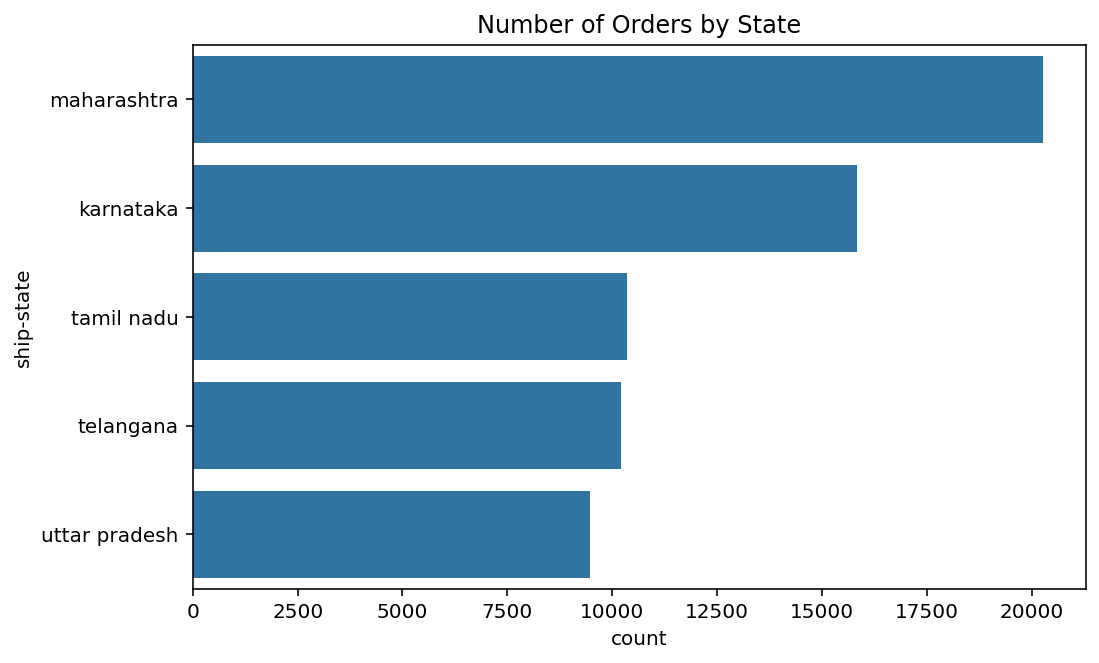

In [223]:
#Visualizing a bar graph of the top 5 states by amount
plt.figure(figsize = (8, 5))

sns.countplot(y = 'ship-state', data = sale_df, order=sale_df['ship-state'].value_counts().iloc[:5].index)
plt.title('Number of Orders by State');

- The state with the most number of orders is Maharashtra summing over 20000 orders. With almost 16000 orders, the second state is Karmataka. These are followed by Tamil Nadu, Telangana, and Uttar Pradesh with each account for around 10000 orders.

### Cities with Higher Percentage of Orders

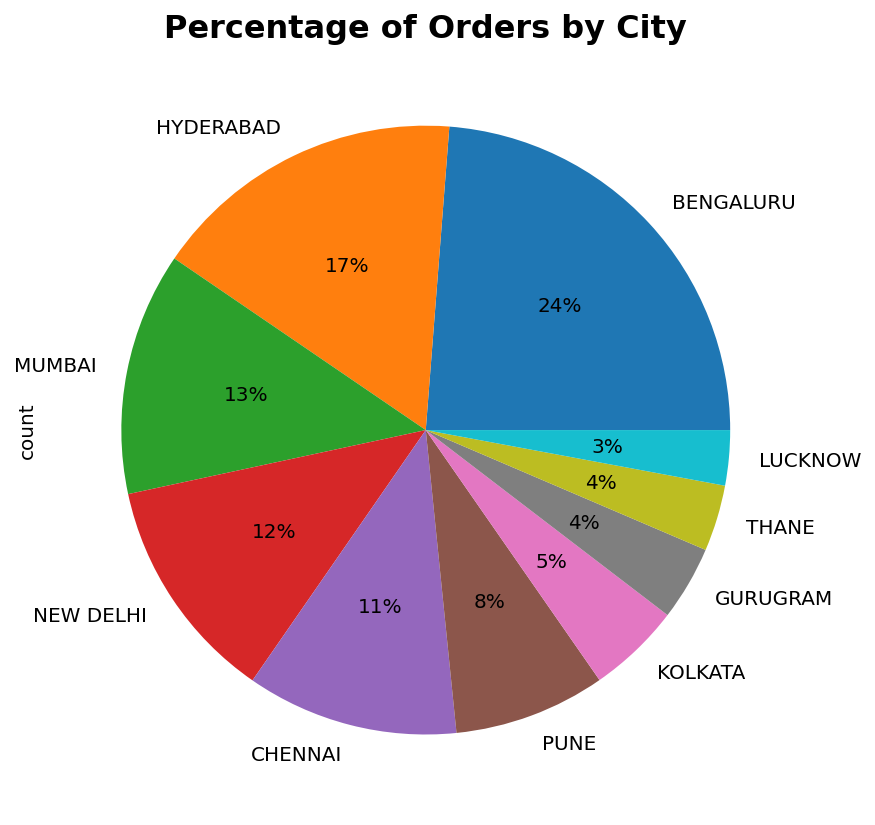

In [224]:
#Visualizing a pie graph of the top cities by total orders in percentages
pd.value_counts(sale_df['ship-city'])[0:10].plot(kind = 'pie' , autopct = '%1.0f%%')

plt.title('Percentage of Orders by City' , fontsize = 16, fontweight = "bold")
plt.show()

- The city leading with 27% of all orders in Bengaluru, followed by Hyderabad, Mumbai, and Chennai with 19%, 15%, and 13% of all orders, respectively.

### Preferred Product Categories

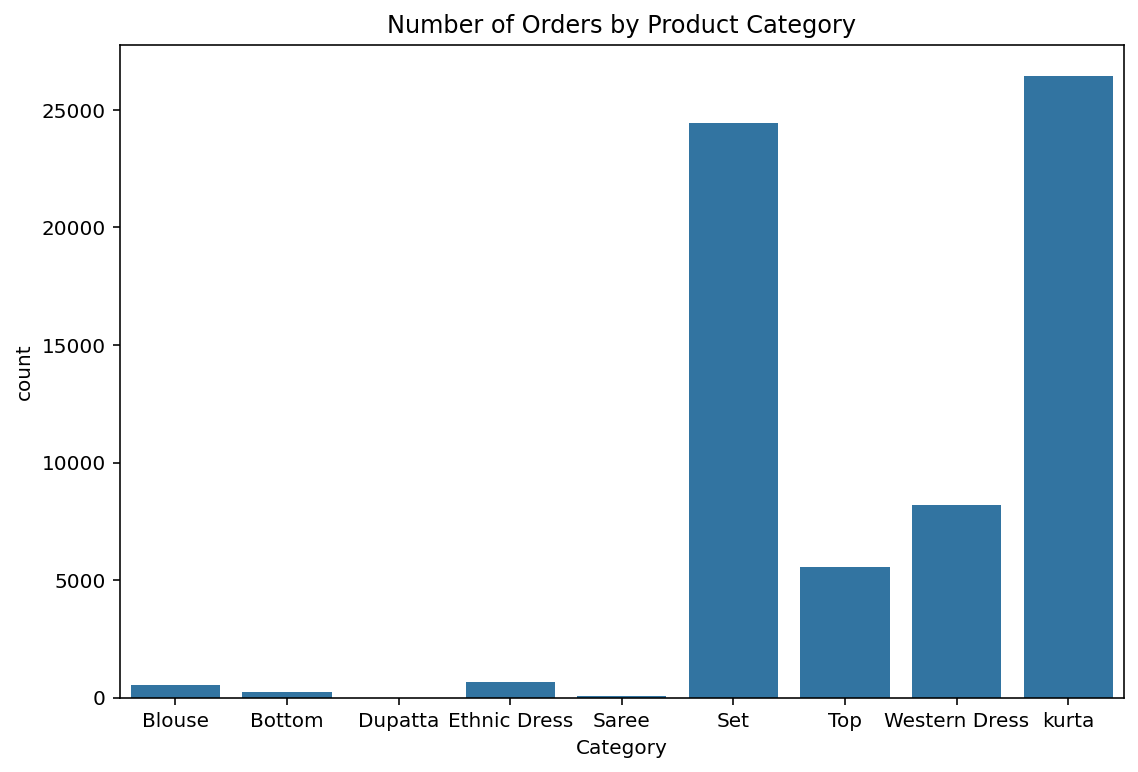

In [248]:
# Visualizing the number of orders by product category
plt.figure(figsize = (9,6))

sns.countplot(x = 'Category', data = sale_df)
plt.title('Number of Orders by Product Category');

- The product category with the highest number of orders is Kurta with over 25000 orders, followed by Set with a little less than 25000. From the rest of the categories, only Top and Western Dress have a count of over 5000 orders.

### Preferred Product Categories by State

In [236]:
# Pivot table displaying quantity and average amount of all clothing category
top_states = ['maharashtra', 'karnataka', 'tamil nadu', 'telangana', 'uttar pradesh']
sale_df = sale_df[sale_df['ship-state'].isin(top_states)]
cat_df = sale_df.groupby(['ship-state', 'Category']).agg({'Qty': 'sum', 'Amount': 'mean'})
cat_df = cat_df.sort_values(by=['ship-state', 'Qty'], ascending=[False, False])
cat_df = cat_df.query('Qty > 1')
cat_df


Qty      Amount
ship-state    Category                       
uttar pradesh Set            4563  855.986831
              kurta          3104  457.236228
              Western Dress   902  754.570628
              Top             731  538.643836
              Blouse           80  478.734177
              Ethnic Dress     77  740.181818
              Bottom           28  383.071429
              Saree            14  832.785714
telangana     kurta          4343  464.070058
              Set            3490  841.675878
              Western Dress  1576  791.542438
              Top             600  539.836120
              Ethnic Dress    121  772.082645
              Blouse           79  470.835443
              Bottom           36  342.638889
              Saree             6  856.333333
              Dupatta           2  305.000000
tamil nadu    kurta          5273  449.571674
              Set            3102  816.317666
              Western Dress  1169  772.764605
              Top             633  521.068038
              Ethnic Dress     83  799.204819
              Blouse           73  529.794521
              Bottom           48  316.541667
              Saree            31  799.928571
maharashtra   kurta          7631  454.393820
              Set            7457  815.380056
              Western Dress  2552  754.383739
              Top            2277  515.520458
              Ethnic Dress    226  696.200893
              Blouse          109  534.055046
              Bottom           58  356.862069
              Saree            18  841.470588
karnataka     kurta          6220  454.035269
              Set            5896  820.000000
              Western Dress  2045  770.459579
              Top            1327  529.664404
              Blouse          185  553.232432
              Ethnic Dress    155  724.677419
              Bottom           50  323.940000
              Saree            22  755.909091

- All five states have the same product categories in their Top 3: Western Dress, Kurta and Set.
- It's evident that Kurta is the clear winner in terms of popularity, as it is the most sought-after category in four out of the five top states.

### Product Categories with Higher Sales

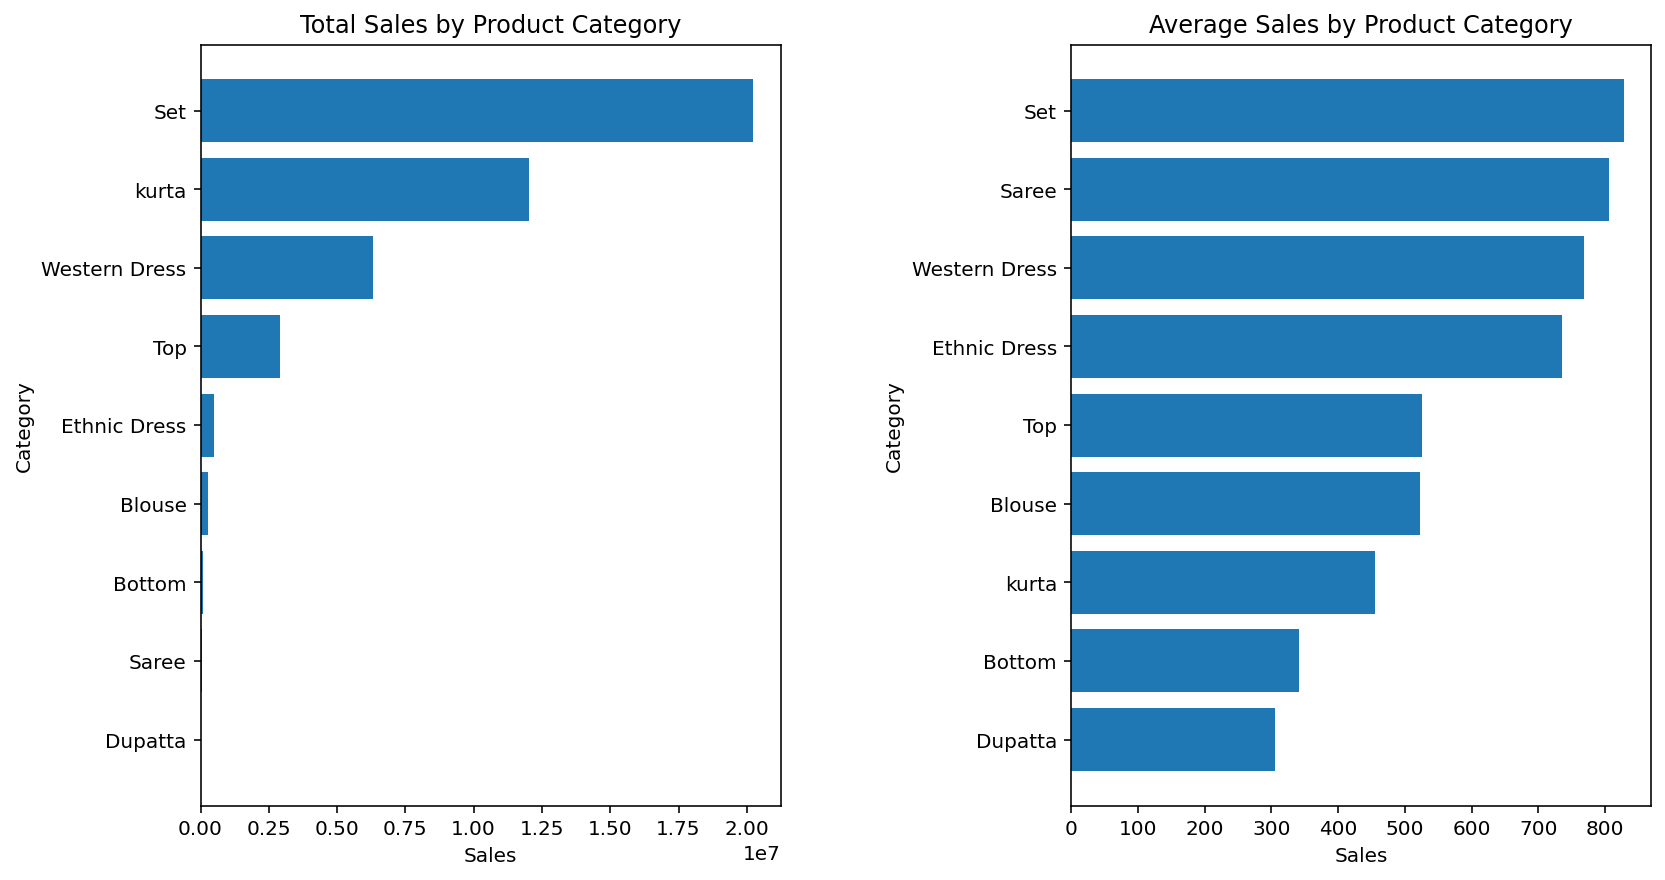

In [237]:
# Distribution of total and average sales by product category

category_total = sale_df[sale_df['Qty']>0].groupby('Category')['Amount'].sum().reset_index().sort_values(by='Amount',ascending=True)
category_average = sale_df[sale_df['Qty']>0].groupby('Category')['Amount'].mean().reset_index().sort_values(by='Amount',ascending=True)

fig, axs = plt.subplots(nrows=1, ncols=2,figsize=(13,7))
axs[0].barh(category_total['Category'],category_total['Amount'])
axs[0].set(xlabel='Sales',ylabel='Category')
axs[0].set_title('Total Sales by Product Category')

axs[1].barh(category_average['Category'],category_average['Amount'])
axs[1].set(xlabel='Sales',ylabel='Category')
axs[1].set_title('Average Sales by Product Category')

plt.subplots_adjust(wspace=0.5)
plt.show()

- The distribution of total sales is dominated by 4 categories being Set with ver $20 Million in sales, Kurta with a little over $12.5 Million, Western Dress reaching $7.5 Million, and Top with almost $4 Million in sales.
- Nonetheless, the higher average sales categories are not all consistent. Set still leads the board with an average of a little over $800, Saree comes second averaging a little less than $800 and the third is Ethnic Dress with an average of over $700 in sales.

### Most Requested Clothing Sizes 

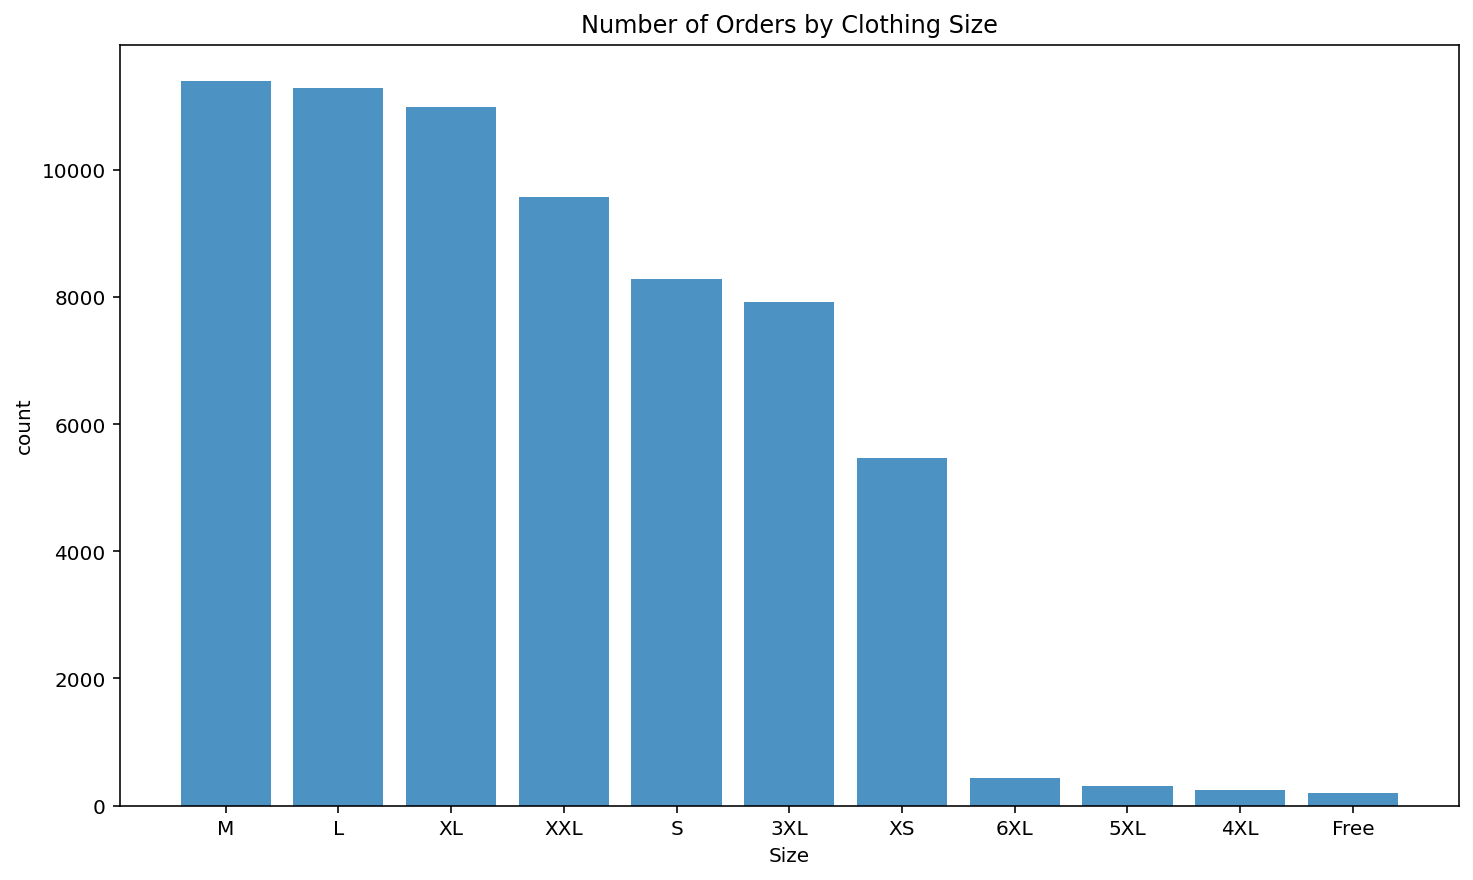

In [239]:
# Visualizing the number of orders by each clothing size
plt.bar(x=sale_df.Size.value_counts().index,height=sale_df.Size.value_counts(),alpha=0.8)

plt.xlabel("Size")
plt.ylabel("count")
plt.title("Number of Orders by Clothing Size");

- The clothing size that is most requests are of sizes M, L, and XL, respectively; with the three accounting for over 10000 purchases each.
- Sizes above 4XL have received little requests, adding to less than 1000 each.

### Distribution of Fulfillment

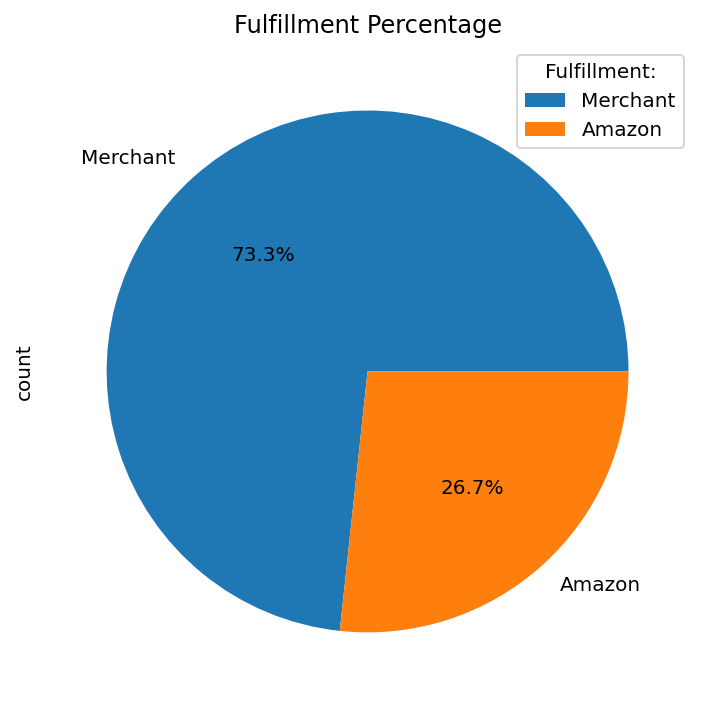

In [241]:
# Visualizing the dominance of Amazon fulfillment responsability
plt.figure(figsize = (8, 6))

sale_df['Fulfilment'].value_counts().plot.pie(autopct="%1.1f%%",labels = sale_df['Fulfilment'].unique(), shadow = False)
plt.title('Fulfillment Percentage')
plt.legend(title = "Fulfillment:")
plt.show()

- Product fulfillment can be either done by Amazon or the Merchant itself. The visual shows that over 73% of all product fulfillments are done by the Merchant.

### Distribution of Fulfillment by Fulfillment Status

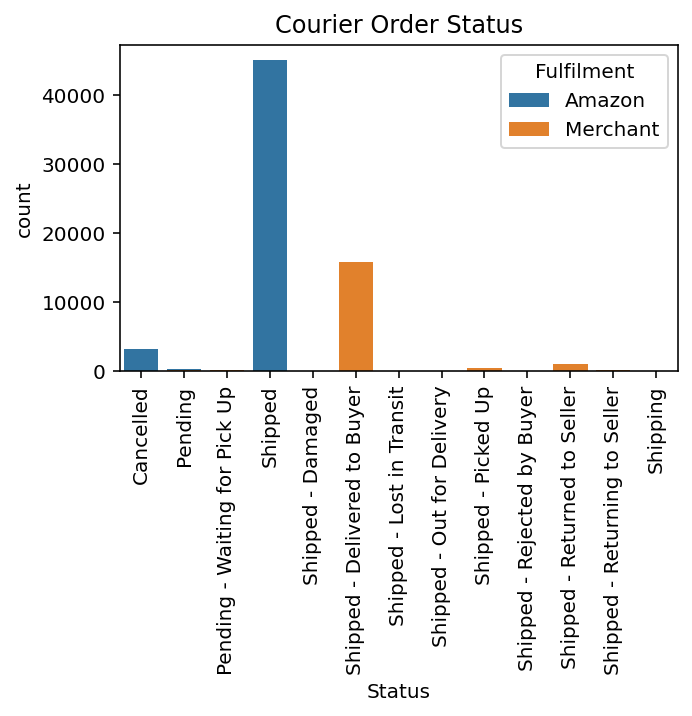

In [242]:
# Visualizing either Amazon or Merchants are more responsible for each fulfillment status
plt.figure(figsize = (5,3))
           
sns.countplot(x = 'Status', hue = 'Fulfilment', data = sale_df)
plt.title('Courier Order Status')
plt.xticks(rotation=90);

- Negative order status such as Cancelled, Pending, and Damaged are all mostly fulfilled by Amazon. Nonetheless, the majority of orders with status Shipped, which is the perfect scenario, is also mostly fulfilled by Amazon.

### Monthly Revenue

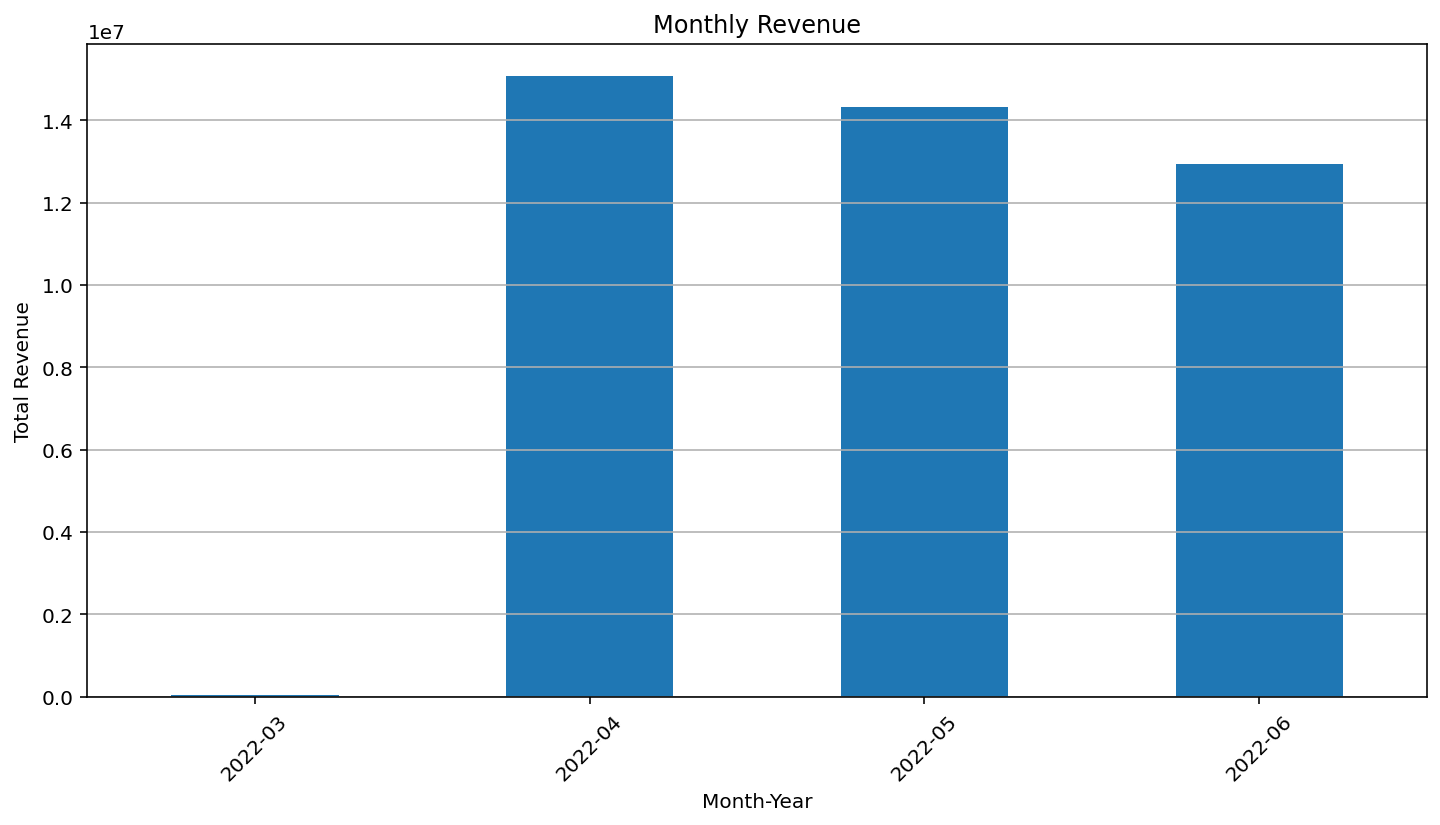

In [243]:
# Visualizing total revenue by month 
sale_df['Date'] = pd.to_datetime(sale_df['Date'], format='%m-%d-%y')
sale_df['Month-Year'] = sale_df['Date'].dt.to_period('M')

monthly_revenue = sale_df.groupby('Month-Year')['Amount'].sum()

plt.figure(figsize=(12, 6))
monthly_revenue.plot(kind='bar')
plt.title('Monthly Revenue')
plt.xlabel('Month-Year')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

- The month of April accounts for the highest revenue with over $15 Million. It is followed by May with a little over $14 Million and June with nearly $13 Million.

### Trend of B2B and Non-B2B Sales

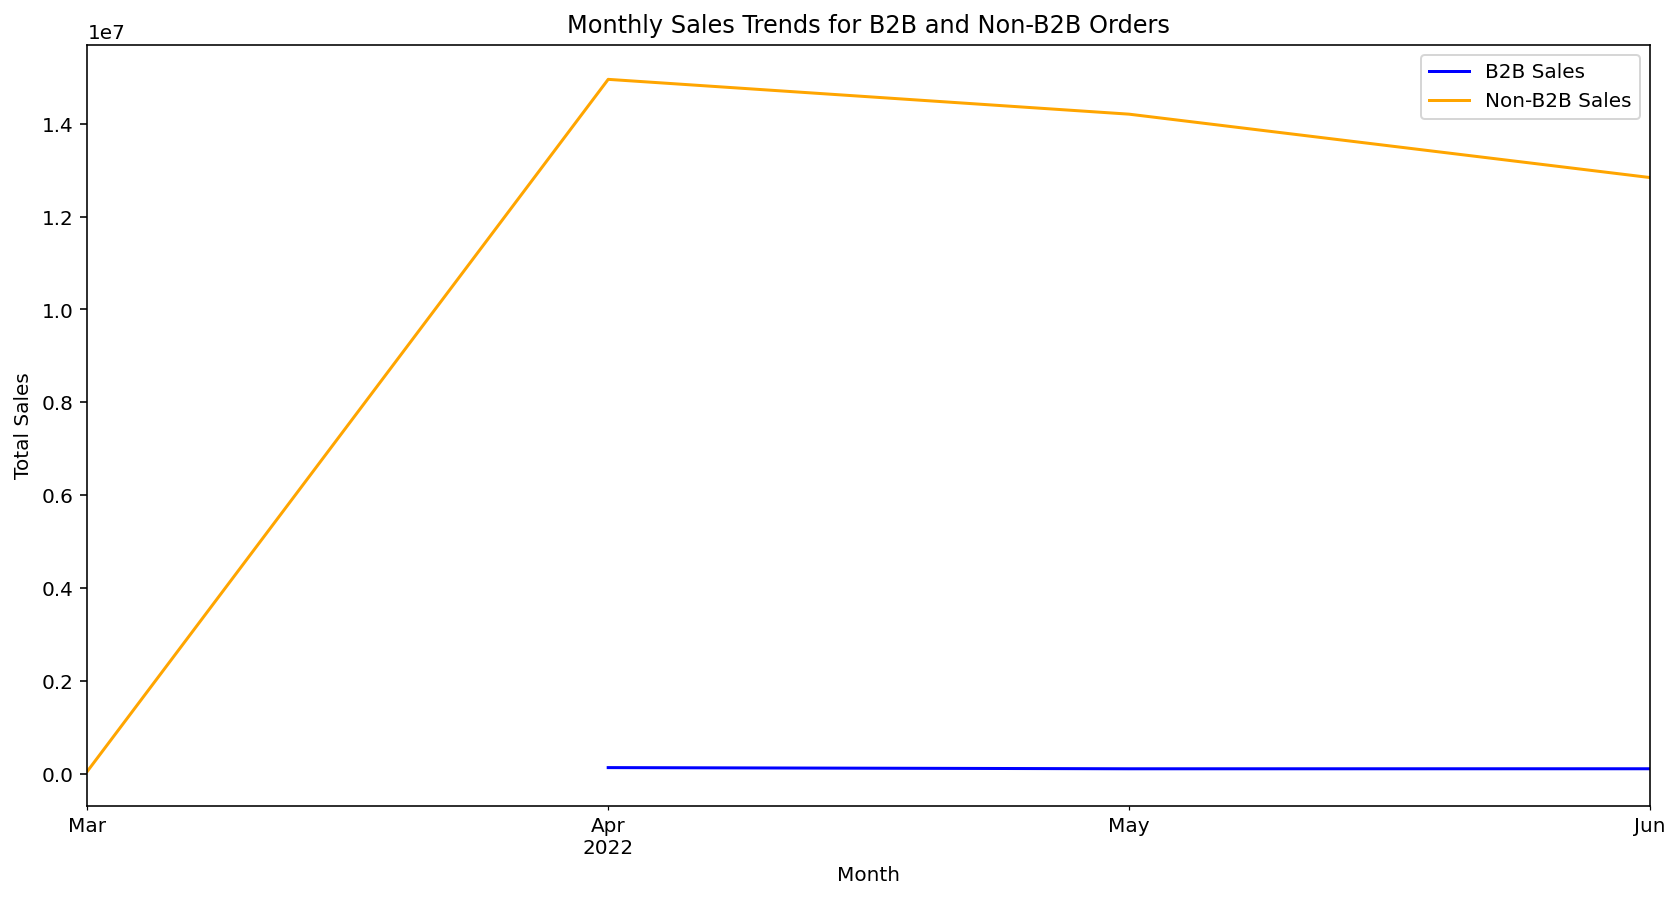

In [247]:
# Visualizing monthly sales trends of sales
monthly_sales_b2b = sale_df[sale_df['B2B']].resample('M', on='Date')['Amount'].sum()
monthly_sales_non_b2b = sale_df[~sale_df['B2B']].resample('M', on='Date')['Amount'].sum()

plt.figure(figsize=(14, 7))
monthly_sales_b2b.plot(label='B2B Sales', color='blue') 
monthly_sales_non_b2b.plot(label='Non-B2B Sales', color='orange') 
plt.title('Monthly Sales Trends for B2B and Non-B2B Orders') 
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

- Most of the orders recorded were Non-B2B (B2C).
- The visual shows fluctuations in the number of orders for Non-B2B sales but little to no fluctuations for B2C sales.

### Sales Type with Higher Average Sales Value

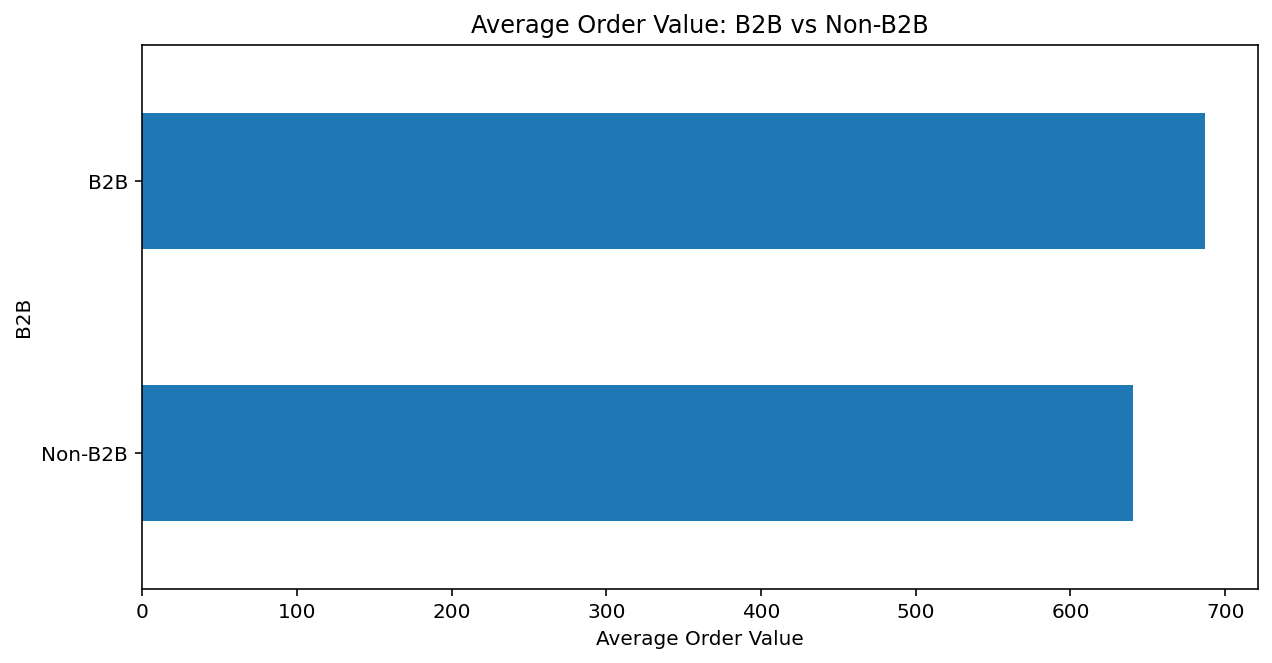

In [245]:
# Average order value for B2B vs Non-B2B sales
b2b_order_value = sale_df.groupby('B2B')['Amount'].mean()
plt.figure(figsize=(10, 5))
b2b_order_value.plot(kind='barh', title='Average Order Value: B2B vs Non-B2B')
plt.xlabel('Average Order Value')
plt.yticks([0, 1], ['Non-B2B', 'B2B'])
plt.show()

- B2B orders have a higher average order value reaching almost $700, while Non-B2B has an average of less than $500 per order.

## Hypotheses Evaluation & Conclusion

- Only one of the top five states with most orders is also on the top five most populated states of India. Nonetheless, the top five found are part of the top twelve most populated states, suggesting it might have a correlation – even if low. When it comes to cities, the story is different. The top five cities with most orders are part of the top six most populated cities in India. It suggests that population by cities has a higher impact on the number of orders than the overall population of each state.

- The most used clothing type in India is Saree, by far; however the analysis shows a preference for Kurta and Sets. In fact, Saree are the second to last product category with highest orders. This suggests Amazon should not target customers who wear traditional Indian clothing in their day-to-day.

- The top preferred product categories are Kurta, Sets, and Western Dresses, which are the categories with higher total sales value. and due to the high quantity sold they do drive sales revenue. However, Kurta is not part of the top three when looking at the average sales value suggesting they are a very inexpensive product that is sold multiple times in comparison to Sets and Western Dresses.

- Unexpectedly, S size pieces are in less demand, while M, L, XL, and XXL should be prioritized by the industry.  The data clearly demonstrates a higher demand for these particular sizes, and manufacturers could benefit from aligning their production strategies with this trend.

- As expected, Amazon is not the leader on product fulfillment, meaning most of the deliveries are carried out by the merchant. This could be due to the extensive process a merchant must go through to have their product be fulfilled by Amazon. Additionally, having a product be fulfilled by Amazon requires the merchant to pre-produce their products which many do not have the capaility to do.

- Although the ideal order status "Shipped" is dominated by Amazon, the most negative order status are too. This suggests a need for improvement in acquiring pending information from the customer, as well as overall improvement in the fulfillment process.

- Months during summer are known to drive sales revenue. However, the data suggests the month of May and June have brought less revenue than the month of April. It is imperative to notice that the data entries are very limited on time, and more data should be included to further analyse the ideal months for sellers.

- Higher trend fluctuations are seen on Non-B2B sales. This can be explained by the habit of conducting under closed contracts between suppliers and Amazon, rather than processing through the typical e-commerce platform. Thus, these sales transactions are not reflected in the given data. Moreover, B2B sales are usually long term, while B2C are usually short-term.

- Despite the overall market being dominated by Non-B2B sales transactions, it's not surprising that B2B orders tend to be in larger quantities. This can be explained by the fact that business customers often make bulk purchases to meet their supply needs, whereas individual consumers typically purchase smaller quantities. This difference in purchasing behavior creates a higher volume of sales in the B2B space, even though there may be fewer transactions overall. Therefore, as expected, B2B sales account for a higher average revenue per order.